<a href="https://colab.research.google.com/github/abhishekmali9191/Deep-Learning/blob/main/DL_DAY2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**With 1 Layer and Tan h as the activation function**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
# Global Variable
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1
TEST_SIZE = 0.2
EPOCHS = 20000     # Same like Iterations
rng = np.random.default_rng(seed = RANDOM_STATE)


# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 4),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)    # Updating our default plt dictionary with the above parameters in Main Environment.

CMAP = plt.cm.coolwarm         # Setting the colour

plt.style.use('seaborn-v0_8-darkgrid')


In [ ]:
# Importing dataset from sklearn
X, y = datasets.make_moons(n_samples = N_SAMPLE,    # Number of data rows we want
                           noise = NOISE,           # Noise increases the scatter of the datapoints
                           random_state = RANDOM_STATE,
                           shuffle=True)

X.shape , y.shape     # Gives us numpy array

((1000, 2), (1000,))

In [ ]:
data_df = pd.DataFrame(X, columns=('A','B'))    # Converting the data in DataFrame
data_df['target']=y
data_df.sample(10)

,A,B,target
346,-0.825509,0.388857,0
848,1.422566,-0.330183,1
490,-0.215184,0.329466,1
277,-0.708369,0.059043,0
243,1.295148,-0.077259,0
273,0.066785,0.288773,1
320,1.472278,-0.415786,1
216,1.134083,0.714001,0
990,0.117602,1.070382,0
827,0.998031,0.499392,0


<Axes: xlabel='A', ylabel='B'>

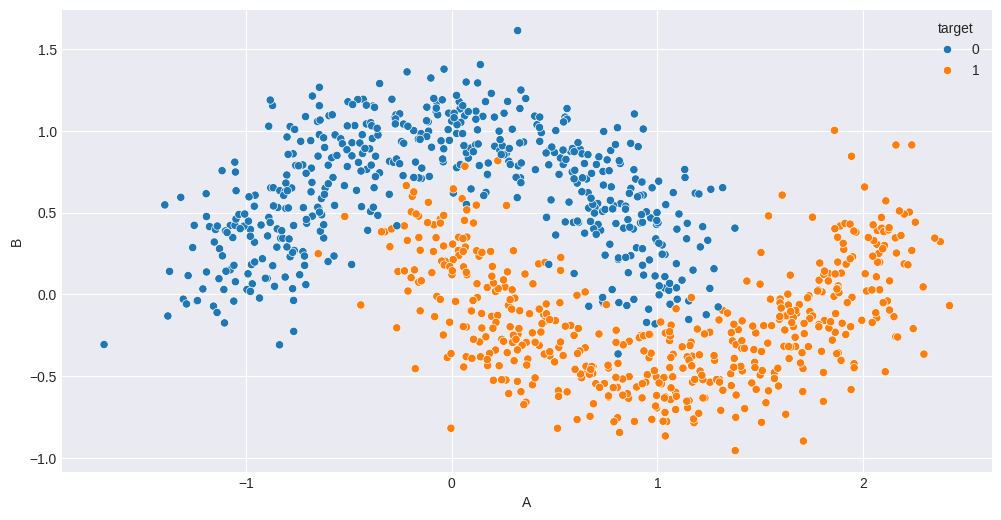

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data= data_df, x = 'A', y ='B', hue='target', ax = ax)

# **Activation Function**

In [ ]:
def activation_func(Z):

    return np.tanh(Z)

def activation_func_prime(Z):

    return 1-(np.tanh(Z)**2)    # Derivative of above function


In [ ]:

# Testing the above functions
activation_func(np.array([[-1,0,1],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [ ]:
def sigmoid_func(Z):
    sigmoid_val = 1 /(1 + np.exp(-Z))
    return sigmoid_val

In [ ]:
# Also updating the predict function
def predict(model , X_p):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

        ###Forward propagation
        #layer 1
        z1 = X_p.dot(W1) + b1      # Aggregation
        a1 = activation_func(z1)   # Activation
        #Layer2
        z2 = a1.dot(W2) + b2      # Aggregation
        a2 = sigmoid_func(z2)     # Activation
        return a2>=0.5

In [ ]:
def func_calculate_loss(model, X_l, y_l):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        m = X_l.shape[0]
        ###Forward propagation
        #layer 1
        z1 = X_l.dot(W1) + b1      # Aggregation
        a1 = activation_func(z1)   # Activation
        #Layer2
        z2 = a1.dot(W2) + b2      # Aggregation
        a2 = sigmoid_func(z2)     # Activation
        data_loss = - y_l* np.log(a2)
        return data_loss.sum()/m

**Spliting the Data**

In [ ]:
features_df = data_df.drop('target', axis = 1)
labels = data_df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify = labels)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()     # Converting the X_train and X_test in numpy


# **Now Building the Model**

In [ ]:
def build_model(nn_hdim, X_t, y_t, n_epochs = EPOCHS, alpha = ALPHA):
    '''
    2    -   4    -   1
    input hidden  output
    '''
    # Get Dimensions for the weights in it
    m , nn_input_dim = X_t.shape
    nn_output_shape =  y_t.shape[1]

    #Initializing the weights
    W1 = rng.random((nn_input_dim, nn_hdim), dtype = np.float32)/np.sqrt(nn_input_dim)   # Weight for layer 1
    W2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32)/np.sqrt(nn_hdim)     # Weigth for layer 2

    # Initializing the bias
    b1 = np.zeros((1, nn_hdim), dtype = np.float32)
    b2 = np.zeros((1, nn_output_shape), dtype = np.float32)

    curr_loss = 0
    loss = []
    epoch = []
    for i in range(n_epochs):
        ###Forward propagation
        #layer 1
        z1 = X_t.dot(W1) + b1      # Aggregation
        a1 = activation_func(z1)   # Activation


        #Layer2
        z2 = a1.dot(W2) + b2      # Aggregation
        a2 = sigmoid_func(z2)     # Activation

        ### BackPropagation
        #Layer2
        dz2 = a2 - y_t # y should be of shape(1, m)
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), 'Shape : W2 - {W2.shape} and dW2 -{dW2.shape}'
        db2 = np.sum(dz2, axis = 0 , keepdims=True)
        assert (b2.shape == db2.shape), 'Shape : b2 - {b2.shape} and db2 -{db2.shape}'
        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), 'Shape : a1 - {a1.shape} and da1 -{da1.shape}'

        # LAyer 1
        dz1 = da1 * activation_func_prime(z1)
        assert (z1.shape == dz1.shape), 'Shape : z1 - {z1.shape} and dz1 -{dz1.shape}'

        dW1 = (X_t.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape : W1 - {W1.shape} and dW1 -{dW1.shape}'

        db1 = np.sum(dz1, axis = 0 , keepdims=True)
        assert (b1.shape == db1.shape), 'Shape : b1 - {b1.shape} and db1 -{db1.shape}'

        #### Gradient DESCENT STEP
        W1 += -alpha * dW1/ m
        W2 += -alpha * dW2/ m
        b1 += -alpha * db1/ m
        b2 += -alpha * db2/ m

        model = {'W1':W1 , 'b1':b1 , 'W2': W2, 'b2':b2}

        if i%100 == 0:
            curr_loss = func_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)

        if i%1000 == 0:
            print(f'Loss after {i :> 5d} epochs : {curr_loss : 0.5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss']  = loss
    # printing the error reduction curve
    fig, ax = plt.subplots()
    ax.plot(loss)
    return model

In [ ]:
loss_hist = {}
y_train = y_train.values.reshape(-1,1)
y_train.shape

(800, 1)

Loss after     0 epochs :  0.29173
Loss after  1000 epochs :  0.14811
Loss after  2000 epochs :  0.11359
Loss after  3000 epochs :  0.07976
Loss after  4000 epochs :  0.05990
Loss after  5000 epochs :  0.04288
Loss after  6000 epochs :  0.03557
Loss after  7000 epochs :  0.03220
Loss after  8000 epochs :  0.03051
Loss after  9000 epochs :  0.02960
Loss after  10000 epochs :  0.02906
Loss after  11000 epochs :  0.02872
Loss after  12000 epochs :  0.02849
Loss after  13000 epochs :  0.02833
Loss after  14000 epochs :  0.02822
Loss after  15000 epochs :  0.02813
Loss after  16000 epochs :  0.02806
Loss after  17000 epochs :  0.02801
Loss after  18000 epochs :  0.02795
Loss after  19000 epochs :  0.02791


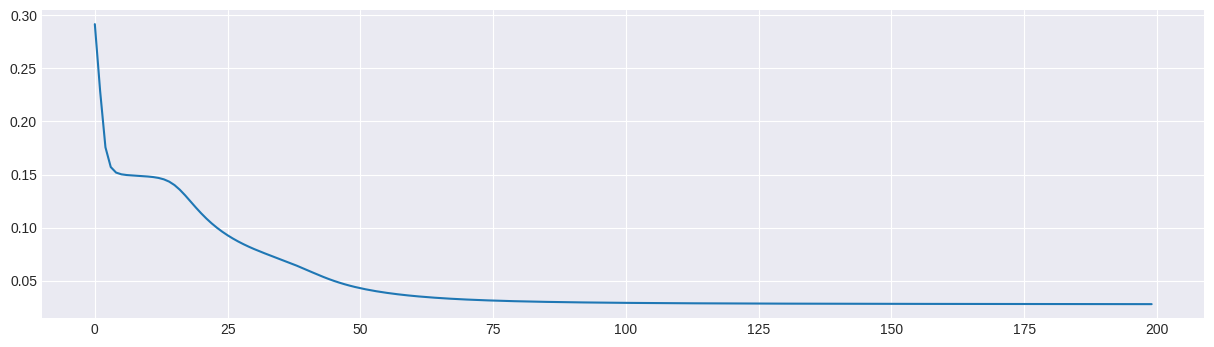

In [ ]:

model =  build_model(4, X_train, y_train)   # try fo 1,4,10,50  alpha = 1, .1, .01, .001
# model =  build_model(1, X_train, y_train, alpha=1)
# model =  build_model(4, X_train, y_train, alpha=.1)
# model =  build_model(10, X_train, y_train,alpha=.01)
# model =  build_model(50, X_train, y_train,alpha=.001)

# model =  build_model(1, X_train, y_train, alpha=1)
# model =  build_model(4, X_train, y_train, alpha=.1)
# model =  build_model(10, X_train, y_train,alpha=.01)
# model =  build_model(50, X_train, y_train,alpha=.001)

# model =  build_model(1, X_train, y_train, alpha=1)
# model =  build_model(4, X_train, y_train, alpha=.1)
# model =  build_model(10, X_train, y_train,alpha=.01)
# model =  build_model(50, X_train, y_train,alpha=.001)

# model =  build_model(1, X_train, y_train, alpha=1)
# model =  build_model(4, X_train, y_train, alpha=.1)
# model =  build_model(10, X_train, y_train,alpha=.01)
# model =  build_model(50, X_train, y_train,alpha=.001)

In [ ]:
y_pred = predict(model, X_train)
accuracy_score(y_true=y_train, y_pred=y_pred)

0.98125

In [ ]:
# Predicting on Test set
y_pred1 = predict(model, X_test)
accuracy_score(y_true=y_test, y_pred=y_pred1)

0.965

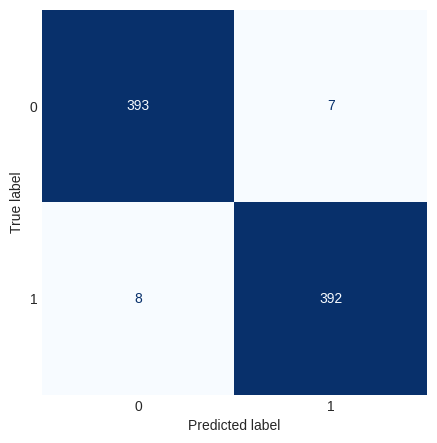

In [ ]:
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize = (5,5))
disp.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
# for finding the decision boundary
def fn_plot_decision_boundary(model, X_tr ,y_tr ,X_ts, y_ts):
    fig , ax = plt.subplots(figsize = (15,6))
    dm = 0.001      # Spacing of the grid

    # Min and Max along two axis
    x_min , x_max = X_tr[:,0].min(), X_tr[:,0].max()
    y_min , y_max = X_tr[:,1].min(), X_tr[:,1].max()

    # Generate a Mesh Grid
    xx ,yy = np.meshgrid(np.arange(x_min , x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]
    y_pred = predict(model, XX)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)    # Fills the background color of the plot
    ax.scatter(X_tr[:,0], X_tr[:,1],c = y_tr, edgecolor='k', cmap = CMAP)
    ax.scatter(X_ts[:,0], X_ts[:,1],c = y_ts, edgecolor='k', cmap = CMAP, marker = 'P')



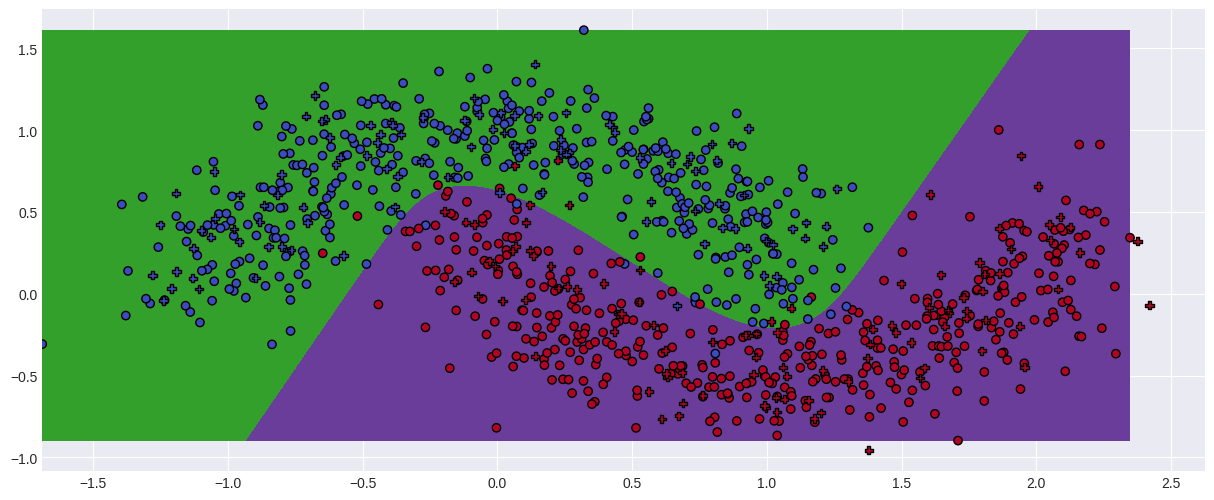

In [ ]:
fn_plot_decision_boundary(model, X_train,y_train,X_test, y_test)